In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling
from scipy import stats
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn. model_selection import train_test_split




# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashion-ecommerce-data/Fashion Data.csv


Загружаем датасет и смотрим первые 5 строк.

In [2]:
dataset = pd.read_csv('/kaggle/input/fashion-ecommerce-data/Fashion Data.csv')
dataset.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (6,7,10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,uuid,url,title,brand,images,date_stored,selling_price,star_rating,size,colour,mrp,product_detials,set_product_price,meta_data,category,product_code,competitor
0,0,https://trends.ajio.com/dnmx-knitted-crew-neck...,Knitted Crew-Neck Pullover,DNMX,https://assets.ajio.com/medias/sys_master/root...,07-06-2022,624,0.0,NaN,"green,mustard",1299,"Machine washable; Flat dry,Ribbed hems,Regular...",0.0,Buy Green Sweaters & Cardigans for Men by DNMX...,Sweaters & Cardigans,4.41E+11,Ajio-Trends
1,00000fcc-8f4d-4174-9e34-8179d398a88d,https://ajiobusiness.com/storefront/ProductDet...,Brasso Printed Regular Saree,JUSTVVV,~^https://assets.ajio.com/b2b/medias/sys_maste...,28-09-2022,576,0.0,NaN,NaN,1499,"{""Length of Saree(UOM)"":""mtr"",""Packaging Type""...",3459.16,NaN,Sarees,464883623,Ajio_b
2,00009f57-a987-4416-88b8-2fe607d6f0de,https://trends.ajio.com/hunters-bay-lace-up-ca...,Lace-Up Casual Shoes with Contrast Panels,HUNTERS BAY,https://assets.ajio.com/medias/sys_master/root...,16-07-2022,909,0.0,NaN,tan,1299,Product Code: 458005708001,0.0,Buy Brown Casual Shoes for Men by HUNTERS BAY ...,Casual Shoes,NaN,Ajio-Trends
3,0000cb86-fd3b-43e9-b0c1-355339650d8b,https://ajiobusiness.com/storefront/ProductDet...,Art Silk Printed Regular Saree,VOOLKA,~^https://assets.ajio.com/b2b/medias/sys_maste...,28-09-2022,285,0.0,NaN,NaN,560,"{""Length of Saree(UOM)"":""mtr"",""Packaging Type""...",571.42,NaN,Sarees,464902247,Ajio_b
4,00018050-b693-408b-a594-adc6e7b53946,https://www.bijnis.com/product/KAYRISE/1071022,Kangarooz 232,Kangarooz,"https://ik.imagekit.io/shoekonnect/tr:w-500,tr...",24-07-2022,130,0.0,"7/3, 8/3, 9/3, 10/3",NaN,499,"{""Category"":""Men PVC Slippers"",""Color"":""Multic...",0.0,"{""moq"":""12 Pairs"",""achievements"":[""38 Likes""],...",men_Slippers,1071022,bijnis


Смотрим какие переменные нам даны

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194242 entries, 0 to 194241
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   uuid               194242 non-null  object
 1   url                194240 non-null  object
 2   title              194240 non-null  object
 3   brand              194242 non-null  object
 4   images             194198 non-null  object
 5   date_stored        194241 non-null  object
 6   selling_price      194241 non-null  object
 7   star_rating        192997 non-null  object
 8   size               77764 non-null   object
 9   colour             56734 non-null   object
 10  mrp                194241 non-null  object
 11  product_detials    188126 non-null  object
 12  set_product_price  194239 non-null  object
 13  meta_data          88857 non-null   object
 14  category           194241 non-null  object
 15  product_code       189423 non-null  object
 16  competitor         1

Смотрим размер датасета

In [4]:
dataset.shape

(194242, 17)

Удаляем лишние столбцы, т. к. они имеют уникальные данные.

In [5]:
data = dataset.drop(axis=1, index=None, columns=['uuid','date_stored', 'url', 'images', 'title', 'product_detials', 'product_code', 'meta_data', 'set_product_price'], inplace=False, errors='ignore')
data.head()

,brand,selling_price,star_rating,size,colour,mrp,category,competitor
0,DNMX,624,0.0,NaN,"green,mustard",1299,Sweaters & Cardigans,Ajio-Trends
1,JUSTVVV,576,0.0,NaN,NaN,1499,Sarees,Ajio_b
2,HUNTERS BAY,909,0.0,NaN,tan,1299,Casual Shoes,Ajio-Trends
3,VOOLKA,285,0.0,NaN,NaN,560,Sarees,Ajio_b
4,Kangarooz,130,0.0,"7/3, 8/3, 9/3, 10/3",NaN,499,men_Slippers,bijnis


Проверяем на наличие NaN в датасете.

In [6]:
data.isna()

,brand,selling_price,star_rating,size,colour,mrp,category,competitor
0,False,False,False,True,False,False,False,False
1,False,False,False,True,True,False,False,False
2,False,False,False,True,False,False,False,False
3,False,False,False,True,True,False,False,False
4,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
194237,False,False,False,True,True,False,False,False
194238,False,False,False,True,True,False,False,False
194239,False,False,False,True,True,False,False,False
194240,False,False,False,True,True,False,False,False


Смотрим сколько их в каждом столбце

In [7]:
data.isna().sum()

brand                 0
selling_price         1
star_rating        1245
size             116478
colour           137508
mrp                   1
category              1
competitor            1
dtype: int64

Удаляем все строчки с NaN и смотрим первые 5 строчек.

In [8]:
data = data.dropna().reset_index(drop=True)
data.head()

,brand,selling_price,star_rating,size,colour,mrp,category,competitor
0,KALAMANDIR,480,0.0,FS,magenta,1199,Sarees,Ajio
1,AVAASA MIX N' MATCH,458,0.0,"XS , S , M , L ,XL,XXL","maroon,navy,pink,grey",899,Sweaters & Cardigans,Ajio-Trends
2,INDETHNIC,2438,0.0,FS,peach,3750,Sarees,Ajio
3,JOMPERS,800,0.0,"S,M,L,XL,XXL",peach,1999,Kurtas,Ajio
4,FUSION,432,0.0,"XS , S , M , L , XL ,XXL","blue,red",899,Kurtis & Tunics,Ajio-Trends


Смотрим получившийся размер датасета после очистки.

In [9]:
data.shape

(41985, 8)

Конвертируем столбцы из строк в нужные типы данных. И также обрабатываем NaN,
возникшие после конвертации типов.

In [10]:
data['selling_price'] = pd.to_numeric(data['selling_price'],errors="coerce")
data['star_rating'] = pd.to_numeric(data['star_rating'],errors="coerce")
data['mrp'] = pd.to_numeric(data['mrp'],errors="coerce")
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41985 entries, 0 to 41984
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          41985 non-null  object 
 1   selling_price  41985 non-null  float64
 2   star_rating    41985 non-null  float64
 3   size           41985 non-null  object 
 4   colour         41985 non-null  object 
 5   mrp            41985 non-null  float64
 6   category       41985 non-null  object 
 7   competitor     41985 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.6+ MB


Производим кодирование значений.

In [12]:
lab = LabelEncoder()
data['category'] = lab.fit_transform(data['category'])
data['competitor'] = lab.fit_transform(data['competitor'])
data['colour'] = lab.fit_transform(data['colour'])
data['size'] = lab.fit_transform(data['size'])
data['brand'] = lab.fit_transform(data['brand'])
data.head()

,brand,selling_price,star_rating,size,colour,mrp,category,competitor
0,671,480.0,0.0,2140,3199,1199.0,89,0
1,127,458.0,0.0,369,3328,899.0,111,1
2,584,2438.0,0.0,2140,4178,3750.0,89,0
3,647,800.0,0.0,2270,4178,1999.0,61,0
4,467,432.0,0.0,362,1670,899.0,63,1


Получаем кросс кореляцию значений.

In [13]:
data.corr()

,brand,selling_price,star_rating,size,colour,mrp,category,competitor
brand,1.000000,0.076806,0.047883,0.144444,0.015302,0.095916,0.079376,-0.058460
selling_price,0.076806,1.000000,-0.109377,0.143464,0.051690,0.875344,-0.057178,-0.253338
star_rating,0.047883,-0.109377,1.000000,0.139398,-0.372180,-0.116409,0.344342,0.776875
size,0.144444,0.143464,0.139398,1.000000,0.004962,0.234089,0.143678,-0.316936
colour,0.015302,0.051690,-0.372180,0.004962,1.000000,0.072431,-0.089382,-0.320143
mrp,0.095916,0.875344,-0.116409,0.234089,0.072431,1.000000,-0.043204,-0.327878
category,0.079376,-0.057178,0.344342,0.143678,-0.089382,-0.043204,1.000000,0.244280
competitor,-0.058460,-0.253338,0.776875,-0.316936,-0.320143,-0.327878,0.244280,1.000000


Из таблицы видно, что selling_price хорошо коррелирует с mrp, size, colour, brand.

In [34]:
data.nunique()

brand            1452
selling_price    2844
star_rating        27
size             2509
colour           5789
mrp              1788
category          134
competitor          4
dtype: int64

In [38]:
data['competitor'].unique()

array([0, 1, 3, 2])

In [55]:
group1 = data[data['competitor']==1]
group2 = data[data['competitor']==3]
stats.ttest_ind(group1['selling_price'], group2['selling_price'])

Ttest_indResult(statistic=17.132278474446892, pvalue=3.275892692880483e-65)

Т. к. p < 0.05, отклоняем гипотезу и делаем вывод что разные типы параметра comptetitor приводят к разным результатам.

Рассмотрим хи квадрат для бренда

In [14]:
l = np.mean(data['brand'])
observed_frequences = np.bincount(data['brand'])
expected_frequences = [len(data['brand'])*stats.poisson.pmf(x, l) for x in range(min(data['brand']), max(data['brand']) + 1)]
stats.chisquare(observed_frequences, expected_frequences, ddof = 1)

Power_divergenceResult(statistic=4.927631591815925e+305, pvalue=0.0)

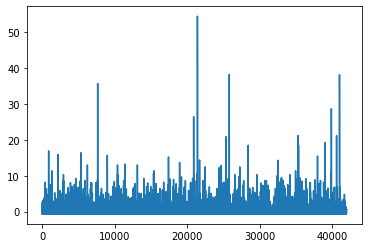

In [56]:
zscores = stats.zscore(data['selling_price'], axis=0, ddof=0, nan_policy='propagate')
plt.plot(zscores)

Строим график зависимости определенных параметров.

<AxesSubplot:xlabel='selling_price'>

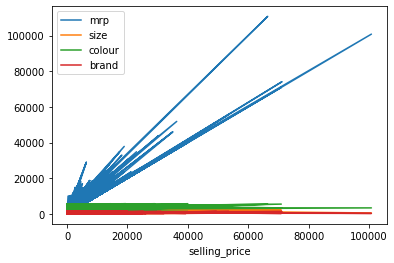

In [21]:
data.plot(x="selling_price", y=["mrp", "size", "colour", "brand"])

Подготавливаем датасет для обучения.

In [57]:
#df_shuffled = shuffle(data, random_state=123)
X = data.drop(columns='selling_price')
Y = data["selling_price"]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0) 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Обучаем линейную регрессию и получаем оценку предсказания модели.

In [58]:
model = LinearRegression().fit(X_train,y_train)
r_sq = model.score(X_test, y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7988509731193616


Обучаем логистическую регрессию и получаем оценку предсказания модели.

In [59]:
model2 = LogisticRegression(solver='liblinear',max_iter=10).fit(X_train,y_train)
y_pred = model2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Accuracy: 0.17561130517624643
